# Khipus.ai
### Case Study: Heart Attack Analysis & Prediction Dataset - Create a NN with PyTorch
<span>© Copyright Notice 2025, Khipus.ai - All Rights Reserved.</span>
---
This notebook implements a neural network using PyTorch to predict whether an individual experienced a heart attack. We will go through the steps of data loading, preprocessing, model definition, training, and evaluation.

## 1. Importing Required Libraries
We start by importing the necessary libraries for data manipulation, visualization, and building our neural network.

In [34]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


## 2. Loading the Dataset
We will load the heart attack dataset from a CSV file and display the first few rows to understand its structure.

In [35]:
# Load the dataset
df = pd.read_csv('heart.csv')
# Display the first few rows of the dataset
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 3. Data Preprocessing
We will separate the features and labels, split the dataset into training and testing sets, and scale the features.

In [36]:
# Separate features and labels
X = df.drop('output', axis=1).values  # Features - Remove the 'output' column from the dataframe and convert remaining columns into a numpy array containing all feature data.
y = df['output'].values  # Labels - Extract the 'output' column from the dataframe as a numpy array containing the target values.

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

# train_test_split: Partition the feature array (X) and label array (y) into training and test sets.
# test_size=0.2 means 20% of the data will be used for testing, while 80% is reserved for training.
# random_state=42 ensures reproducibility of the split.

# Scale the features
scaler = StandardScaler()  # Initialize the StandardScaler object to standardize features by removing the mean and scaling to unit variance.
X_train = scaler.fit_transform(X_train)  
# Fit the scaler on the training feature data (compute mean and standard deviation) and transform the training data accordingly.
X_test = scaler.transform(X_test)  
# Apply the transformation to the test data using the statistics computed from the training data, ensuring consistency.

## 4. Defining the Neural Network Architecture
We will define a simple feedforward neural network with one hidden layer.

In [ ]:
# Define the neural network class that inherits from torch.nn.Module
class HeartAttackNN(nn.Module):
    def __init__(self, input_size):  # Constructor method that initializes the NN layers; input_size specifies the number of features
        super(HeartAttackNN, self).__init__()  # Call the parent class constructor to properly set up the module
        self.fc1 = nn.Linear(input_size, 16)  # First layer with 16 neurons; performs a linear transformation from input dimension to a hidden layer of 16 nodes
        self.fc2 = nn.Linear(16, 1)  # Output layer with 1 neuron; transforms the hidden layer output into a single prediction value
       
    def forward(self, x):  # Forward method defines how the input data flows through the network to produce an output
        x = torch.relu(self.fc1(x))  # Pass input through first layer (fc1) and apply ReLU activation for non-linearity;  # Apply ReLU activation
        x = torch.sigmoid(self.fc2(x))  # Apply sigmoid activation to compress the output between 0 and 1 for binary classification
        return x  # Return the final output which is probability score for binary classification

Hyperparameters:

Width: The hidden layer has 16 neurons.

Depth: The network has 2 fully connected layers (one hidden layer and one output layer)

## 5. Training the Neural Network
We will train the neural network using binary cross-entropy loss and the Adam optimizer.

Note: The code doesn't define a batch size because it uses the entire training set for each iteration of training. Instead of loading data in mini-batches (using, for example, PyTorch's DataLoader), it feeds the whole dataset into the model at once. To incorporate mini-batch training, you'll need to create a DataLoader with a specified batch_size.

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

Hyperparameters

Learning Rate: It is set to 0.001 for the Adam optimizer.

Number of epochs: 100

In [38]:
# Split the training data further into a training set and a validation set.
# We use 10% of the current training data as the validation set.
# The random_state ensures that the split is reproducible.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Convert the numpy arrays for training features to a PyTorch FloatTensor.
X_train_tensor = torch.FloatTensor(X_train)
# Convert the training labels from numpy array to a PyTorch FloatTensor and reshape to a column vector.
y_train_tensor = torch.FloatTensor(y_train).view(-1, 1)
# Convert the numpy arrays for validation features to a PyTorch FloatTensor.
X_val_tensor = torch.FloatTensor(X_val)
# Convert the validation labels from numpy array to a PyTorch FloatTensor and reshape to a column vector.
y_val_tensor = torch.FloatTensor(y_val).view(-1, 1)

# Convert the test features to a PyTorch FloatTensor.
X_test_tensor = torch.FloatTensor(X_test)
# Convert the test labels to a PyTorch FloatTensor and reshape to a column vector.
y_test_tensor = torch.FloatTensor(y_test).view(-1, 1)

# Initialize the neural network model with the number of input features.
model = HeartAttackNN(input_size=X_train.shape[1])
# Define the loss function as Binary Cross Entropy Loss for binary classification.
criterion = nn.BCELoss()  
# Initialize the Adam optimizer with the model parameters and a learning rate of 0.001.
optimizer = optim.Adam(model.parameters(), lr=0.001)  

# Define the number of epochs to train for.
num_epochs = 100

# Training loop: iterate over all epochs.
for epoch in range(num_epochs):
    # Set the model to training mode to enable behaviors such as dropout (if any).
    model.train()
    
    # Zero the gradients before the backward pass.
    optimizer.zero_grad()
    
    # Perform a forward pass using the training tensor and obtain the model outputs.
    train_outputs = model(X_train_tensor)
    
    # Compute the training loss by comparing the predicted outputs with the true labels.
    train_loss = criterion(train_outputs, y_train_tensor)
    
    # Perform a backward pass to compute the gradients.
    train_loss.backward()
    
    # Update the model parameters based on the computed gradients.
    optimizer.step()

    # Set the model to evaluation mode for validation (turns off dropout, etc.).
    model.eval()
    # Perform validation without computing gradients to save memory.
    with torch.no_grad():
        # Forward pass on the validation data to obtain predictions.
        val_outputs = model(X_val_tensor)
        # Compute the validation loss by comparing predictions with validation labels.
        val_loss = criterion(val_outputs, y_val_tensor)

    # Every 10 epochs, print the current training and validation loss.
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

Epoch [10/100], Train Loss: 0.6794, Validation Loss: 0.6692
Epoch [20/100], Train Loss: 0.6554, Validation Loss: 0.6462
Epoch [30/100], Train Loss: 0.6317, Validation Loss: 0.6242
Epoch [40/100], Train Loss: 0.6081, Validation Loss: 0.6023
Epoch [50/100], Train Loss: 0.5843, Validation Loss: 0.5800
Epoch [60/100], Train Loss: 0.5605, Validation Loss: 0.5583
Epoch [70/100], Train Loss: 0.5369, Validation Loss: 0.5381
Epoch [80/100], Train Loss: 0.5136, Validation Loss: 0.5202
Epoch [90/100], Train Loss: 0.4912, Validation Loss: 0.5045
Epoch [100/100], Train Loss: 0.4700, Validation Loss: 0.4909


## 6. Evaluating the Model
After training, we will evaluate the model's performance on the test set.

              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83        29
         1.0       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



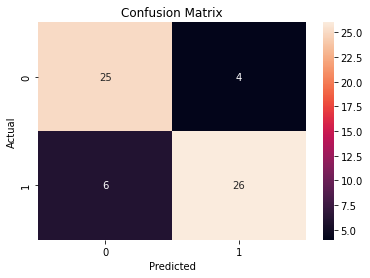

In [39]:
# Set the model to evaluation mode 
# - this ensures that layers like dropout and batch normalization behave accordingly during inference. 
model.eval()
with torch.no_grad():  # Disable gradient calculation to improve efficiency and reduce memory usage during inference, since gradients are not needed. 
    test_outputs = model(X_test_tensor)  # Forward pass on test data: pass the standardized test tensor through the model to obtain predicted probabilities. 
    predicted = (test_outputs > 0.5).float()  # Convert probabilities to binary predictions using a threshold of 0.5, then cast the boolean results to float type. 

# Print classification report
print(classification_report(y_test_tensor, predicted))

# Confusion matrix
conf_matrix = confusion_matrix(y_test_tensor, predicted)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [40]:
# Calculate model accuracy
# Compare the predicted labels with the true test labels for each sample,
# resulting in a tensor of boolean values (True for correct predictions, False for incorrect ones).
# Then, sum these boolean values (with True counted as 1) to obtain the total number of correct predictions.
# Finally, convert the resulting tensor to a Python number using .item().
correct = (predicted == y_test_tensor).sum().item()

# Retrieve the total number of test samples by getting the size of the first dimension of the tensor.
total = y_test_tensor.size(0)

# Calculate the accuracy by dividing the total number of correct predictions by the total number of samples.
accuracy = correct / total

# Output the computed test accuracy to the console.
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8360655737704918
